In [8]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
plt.rc('font', family = "Malgun Gothic")
plt.style.use('ggplot')

# 1. 블록별 업종별 매출액 (월 평균)

## 1.1 데이터 불러오기

In [9]:
# 매출금액
SELNG = pd.read_csv("C:/Users/bigdata10/Desktop/데이터/SELNG.csv",sep="|") 
SELNG.head()

,BLCK_CD,TA_YM,KSIC_CD,MCT_CNT,AMT,CNT,MIN_AMT,MIN_CNT,MAX_AMT,MAX_CNT,...,RCNT_60,MCT_SALES,NEW_MCT,P1_M6,P1_1Y,P1_2Y,P1_3Y,P1_4Y,P1_5Y,P1_6Y
0,10019,201701,47413,1,5000000,1,5000000,1,5000000,1,...,0,25,0,0,0,0,1,0,0,0
1,10019,201701,47416,1,20158000,15,20158000,15,20158000,15,...,1,130,0,0,0,0,0,0,0,1
2,10019,201701,47420,1,1429000,3,1429000,3,1429000,3,...,0,19,0,0,0,1,0,0,0,0
3,10019,201701,47811,1,12668290,706,12668290,706,12668290,706,...,33,101,0,0,0,0,0,0,0,1
4,10019,201701,47813,1,4000000,1,4000000,1,4000000,1,...,0,13,0,0,0,1,0,0,0,0


In [10]:
# 업종매핑 테이블
SVC = pd.read_csv("C:/Users/bigdata10/Desktop/데이터/SVC_INDUTY_MAPNG_NEW.csv",sep="|")
SVC.head()

,SVC_INDUTY_CD,SVC_INDUTY_CD_NM,INDUTY_CD,INDUTY_CD_NM
0,CS100001,한식음식점,56111,한식 음식점업
1,CS100002,중식음식점,56112,중식 음식점업
2,CS100003,일식음식점,56113,일식 음식점업
3,CS100004,양식음식점,56114,서양식 음식점업
4,CS100004,양식음식점,56119,기타 외국식 음식점업


In [11]:
# SELNG과 SVC 테이블의 공통 컬럼 
print("표준업종코드 개수 :",len(SELNG["KSIC_CD"].unique()))
print("서비스업종코드명 개수 :",len(SVC["SVC_INDUTY_CD_NM"].unique()))

표준업종코드 개수 : 143
서비스업종코드명 개수 : 100


In [12]:
# 블록별 업종별 매출액을 보기 위해서 SELNG과 SVC 테이블을 merge
SVC_CODE = SVC[["SVC_INDUTY_CD_NM","INDUTY_CD"]]
merged_df = pd.merge(SELNG, SVC_CODE, left_on="KSIC_CD", right_on="INDUTY_CD")
merged_df 

,BLCK_CD,TA_YM,KSIC_CD,MCT_CNT,AMT,CNT,MIN_AMT,MIN_CNT,MAX_AMT,MAX_CNT,...,NEW_MCT,P1_M6,P1_1Y,P1_2Y,P1_3Y,P1_4Y,P1_5Y,P1_6Y,SVC_INDUTY_CD_NM,INDUTY_CD
0,10019,201701,47413,1,5000000,1,5000000,1,5000000,1,...,0,0,0,0,1,0,0,0,일반의류,47413
1,10186,201701,47413,2,510000,8,40000,1,470000,7,...,0,0,0,2,0,0,0,0,일반의류,47413
2,11636,201701,47413,1,110000,1,110000,1,110000,1,...,0,0,0,0,0,0,0,1,일반의류,47413
3,151709,201701,47413,2,992000,15,347000,4,645000,11,...,0,0,0,1,1,0,0,0,일반의류,47413
4,151804,201701,47413,1,35000,1,35000,1,35000,1,...,0,0,0,0,1,0,0,0,일반의류,47413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701552,31195,201911,75212,1,1080000,2,1080000,2,1080000,2,...,0,0,0,0,0,0,0,1,여행사,75212
701553,417821,201911,75212,1,28933374,64,28933374,64,28933374,64,...,0,0,0,0,0,0,0,1,여행사,75212
701554,31154,201912,75212,1,100000,1,100000,1,100000,1,...,0,0,0,0,0,0,0,1,여행사,75212
701555,417821,201912,75212,1,30731846,73,30731846,73,30731846,73,...,0,0,0,0,0,0,0,1,여행사,75212


## 1.2 블록/업종별 Groupby

In [13]:
grouped_amt = merged_df.groupby(["BLCK_CD","SVC_INDUTY_CD_NM"])["AMT"].mean().unstack()
grouped_amt

SVC_INDUTY_CD_NM,DVD방,PC방,가구,가방,가전제품,가전제품수리,가정용품임대,건축물청소,게스트하우스,고시원,...,편의점,피부관리실,한복점,한식음식점,한의원,핸드폰,호프-간이주점,화장품,화초,회계사사무소
BLCK_CD,,,,,,,,,,,,,,,,,,,,,
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.619823e+06,NaN,NaN,1.540482e+06,NaN,NaN,1.730575e+06,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.979200e+05,NaN
1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502544,NaN,7334100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.365898e+07,NaN,NaN,NaN,1.922941e+05,8.297336e+06,NaN
502557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.495000e+04,NaN,NaN,3.661750e+06,NaN,NaN,NaN,NaN,NaN,NaN
502558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.447347e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for blck in grouped_amt.index:
    grouped_amt.loc[blck, "블록 평균매출액"] = grouped_amt.loc[blck].mean() #블록 내 모든 업종의 월평균 매출액 컬럼 추가
grouped_amt

SVC_INDUTY_CD_NM,DVD방,PC방,가구,가방,가전제품,가전제품수리,가정용품임대,건축물청소,게스트하우스,고시원,...,피부관리실,한복점,한식음식점,한의원,핸드폰,호프-간이주점,화장품,화초,회계사사무소,블록 평균매출액
BLCK_CD,,,,,,,,,,,,,,,,,,,,,
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.540482e+06,NaN,NaN,1.730575e+06,NaN,NaN,NaN,2.891518e+06
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.408681e+06
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.191667e+05
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.979200e+05,NaN,4.724596e+06
1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.814389e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502544,NaN,7334100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.365898e+07,NaN,NaN,NaN,1.922941e+05,8.297336e+06,NaN,3.427203e+07
502557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.661750e+06,NaN,NaN,NaN,NaN,NaN,NaN,2.341555e+06
502558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.060313e+06


## 1.3 월평균 매출이 블록 평균보다 높은 업종

In [15]:
blck_cd = []
svc_induty_cd_nm = []
mnth_amt = []

svc_list = grouped_amt.columns # 101개 업종
blck = grouped_amt.index # 4108개 블록

for b in blck:
    for idx, amt in enumerate(grouped_amt.loc[b][:-1]):
        if amt > grouped_amt.loc[b][-1]: # 해당 업종의 월평균 매출이 전체 업종 월평균 매출보다 큰 경우 
            blck_cd.append(b)                      # 블록코드
            svc_induty_cd_nm.append(svc_list[idx]) # 서비스업종 코드명
            mnth_amt.append(amt)                   # 월평균 매출
            #print(b, svc_list[idx], amt)

In [16]:
# 블록 내에서 월평균 매출이 평균보다 높은 업종들
high_amt_svc = pd.DataFrame({"BLCK_CD": blck_cd,
                             "SVC_INDUTY_CD_NM": svc_induty_cd_nm, 
                             "MNTH_AMT": mnth_amt}) 
high_amt_svc

,BLCK_CD,SVC_INDUTY_CD_NM,MNTH_AMT
0,118,편의점,9.619823e+06
1,164,일식음식점,4.673167e+06
2,221,운동/경기용품,2.164258e+07
3,1689,커피-음료,7.988333e+05
4,1698,미곡판매,5.736273e+05
...,...,...,...
9509,502813,일반의원,1.574612e+07
9510,502813,제과점,1.555173e+07
9511,502813,청과상,1.376952e+07
9512,502813,치과의원,1.054329e+07


# 2. 블록별 업종별 생존기간

## 1.1 데이터 불러오기

In [17]:
len(CNFM["STD_INDCLS_INDUTY_CD"].unique()) # 975개 업종

975

In [18]:
# 상가업소정보
CNFM = pd.read_csv("C:/Users/bigdata10/Desktop/데이터/CNFM_PRMISN.csv",sep="|") 
CNFM.head()

,STDR_YM_CD,STOR_INNB,STOR_NM,SVC_INDUTY_CD,OPBIZ_YM,CLSBIZ_YM,OLD_ADRES,NW_ADRES,TELNO,BLCK_CD,HOUS_ID,PROC_CLSS,DW_REGIST_DT,ROAD_CD,XCNTS_VALUE,YDNTS_VALUE,FRC_YN,STD_INDCLS_INDUTY_CD
0,201701,1004608612,쉐******,NaN,201203,201207.0,NaN,NaN,070)8237-3641,182090,900000,NaN,17-SEP-19,NaN,205255.0,446365.0,N,56194
1,201701,1004603916,라****,NaN,201412,201707.0,NaN,NaN,02)977-9945,182090,900000,NaN,17-SEP-19,NaN,205255.0,446365.0,N,56220
2,201701,1004459199,쉐******,NaN,201207,201410.0,NaN,NaN,070)8237-3641,182090,900000,NaN,17-SEP-19,NaN,205255.0,446365.0,N,56220
3,201701,1004606943,동****,NaN,201302,201612.0,NaN,NaN,02)544-5185,267484,910029,NaN,17-SEP-19,NaN,205306.0,446235.0,N,47711
4,201701,1005642004,고****,NaN,200006,NaN,NaN,NaN,02)563-0450,269179,920010,NaN,17-SEP-19,NaN,203909.0,447190.0,N,45110


In [19]:
CNFM['STOR_INNB'].value_counts() # 중복된 업소들이 존재함

1003367667    36
1003319199    36
1003822407    36
1003916514    36
1003831680    36
              ..
1002938962     1
1003661140     1
1003002106     1
1004461130     1
1003238930     1
Name: STOR_INNB, Length: 784187, dtype: int64

In [20]:
CNFM_UNIQUE = CNFM.drop_duplicates(subset=["STOR_INNB"],keep="last") # 중복된 업소 제거하기
CNFM_UNIQUE.reset_index(inplace=True)
CNFM_UNIQUE = CNFM_UNIQUE.drop("index", axis=1)
CNFM_UNIQUE.head()

,STDR_YM_CD,STOR_INNB,STOR_NM,SVC_INDUTY_CD,OPBIZ_YM,CLSBIZ_YM,OLD_ADRES,NW_ADRES,TELNO,BLCK_CD,HOUS_ID,PROC_CLSS,DW_REGIST_DT,ROAD_CD,XCNTS_VALUE,YDNTS_VALUE,FRC_YN,STD_INDCLS_INDUTY_CD
0,201906,1004015113,한***,NaN,200704,NaN,NaN,NaN,02)904-6694,219851,390002,NaN,17-SEP-19,NaN,201935.0,460279.0,N,28423
1,201906,1003767731,사********,NaN,201007,NaN,NaN,NaN,02)518-1779,132329,1090000,NaN,17-SEP-19,NaN,203387.0,446580.0,N,46433
2,201906,1003768050,동*****,NaN,201003,NaN,NaN,NaN,NaN,30757,0,NaN,17-SEP-19,NaN,202741.0,446136.0,N,75120
3,201906,1003104828,삼****,NaN,201509,201607.0,NaN,NaN,02)548-1525,29515,420011,NaN,17-SEP-19,NaN,202223.0,445976.0,N,52915
4,201906,1004582176,대*****,NaN,201406,NaN,NaN,NaN,02)552-6696,350525,1130004,NaN,17-SEP-19,NaN,204129.0,445699.0,N,45219


## 1.2 영업기간 구하기

In [21]:
CNFM["CLSBIZ_YM"].isnull().sum()/len(CNFM)*100 # 폐업연월이 nan인 업소의 비율

34.42666776748636

In [22]:
# 개업연월, 폐업연월 컬럼 전처리
CNFM_UNIQUE["OPBIZ_YM"] = pd.to_datetime(CNFM_UNIQUE["OPBIZ_YM"], format = "%Y%m")   
CNFM_UNIQUE["CLSBIZ_YM"] = pd.to_datetime(CNFM_UNIQUE["CLSBIZ_YM"], format = "%Y%m")
CNFM_UNIQUE["CLSBIZ_YM"].fillna(pd.Timestamp("2019-12-31"), inplace=True) # 폐업연월이 NaN인 경우
CNFM_UNIQUE.head()

,STDR_YM_CD,STOR_INNB,STOR_NM,SVC_INDUTY_CD,OPBIZ_YM,CLSBIZ_YM,OLD_ADRES,NW_ADRES,TELNO,BLCK_CD,HOUS_ID,PROC_CLSS,DW_REGIST_DT,ROAD_CD,XCNTS_VALUE,YDNTS_VALUE,FRC_YN,STD_INDCLS_INDUTY_CD
0,201906,1004015113,한***,NaN,2007-04-01,2019-12-31,NaN,NaN,02)904-6694,219851,390002,NaN,17-SEP-19,NaN,201935.0,460279.0,N,28423
1,201906,1003767731,사********,NaN,2010-07-01,2019-12-31,NaN,NaN,02)518-1779,132329,1090000,NaN,17-SEP-19,NaN,203387.0,446580.0,N,46433
2,201906,1003768050,동*****,NaN,2010-03-01,2019-12-31,NaN,NaN,NaN,30757,0,NaN,17-SEP-19,NaN,202741.0,446136.0,N,75120
3,201906,1003104828,삼****,NaN,2015-09-01,2016-07-01,NaN,NaN,02)548-1525,29515,420011,NaN,17-SEP-19,NaN,202223.0,445976.0,N,52915
4,201906,1004582176,대*****,NaN,2014-06-01,2019-12-31,NaN,NaN,02)552-6696,350525,1130004,NaN,17-SEP-19,NaN,204129.0,445699.0,N,45219


In [23]:
# 영업기간(월) 구하기
CNFM_UNIQUE["BIZ_MNTH"] = round(((CNFM_UNIQUE["CLSBIZ_YM"]-CNFM_UNIQUE["OPBIZ_YM"])/np.timedelta64(1,'M')),0).astype(int)
CNFM_UNIQUE[["OPBIZ_YM", "CLSBIZ_YM", "BIZ_MNTH"]]

,OPBIZ_YM,CLSBIZ_YM,BIZ_MNTH
0,2007-04-01,2019-12-31,153
1,2010-07-01,2019-12-31,114
2,2010-03-01,2019-12-31,118
3,2015-09-01,2016-07-01,10
4,2014-06-01,2019-12-31,67
...,...,...,...
784182,1982-07-01,2019-12-31,450
784183,2000-01-01,2009-06-01,113
784184,1980-11-01,2019-12-31,470
784185,2009-04-01,2010-06-01,14


## 1.3 영업 시기가 같은 업소들 뽑기

In [24]:
CNFM_DEC = CNFM_UNIQUE[CNFM_UNIQUE["CLSBIZ_YM"] >= "2019-12-31"] # 2019년 12월에 영업중인 업소들
CNFM_DEC

,STDR_YM_CD,STOR_INNB,STOR_NM,SVC_INDUTY_CD,OPBIZ_YM,CLSBIZ_YM,OLD_ADRES,NW_ADRES,TELNO,BLCK_CD,HOUS_ID,PROC_CLSS,DW_REGIST_DT,ROAD_CD,XCNTS_VALUE,YDNTS_VALUE,FRC_YN,STD_INDCLS_INDUTY_CD,BIZ_MNTH
0,201906,1004015113,한***,NaN,2007-04-01,2019-12-31,NaN,NaN,02)904-6694,219851,390002,NaN,17-SEP-19,NaN,201935.0000,460279.0000,N,28423,153
1,201906,1003767731,사********,NaN,2010-07-01,2019-12-31,NaN,NaN,02)518-1779,132329,1090000,NaN,17-SEP-19,NaN,203387.0000,446580.0000,N,46433,114
2,201906,1003768050,동*****,NaN,2010-03-01,2019-12-31,NaN,NaN,NaN,30757,0,NaN,17-SEP-19,NaN,202741.0000,446136.0000,N,75120,118
4,201906,1004582176,대*****,NaN,2014-06-01,2019-12-31,NaN,NaN,02)552-6696,350525,1130004,NaN,17-SEP-19,NaN,204129.0000,445699.0000,N,45219,67
9,201906,1003262158,보*****,NaN,2014-08-01,2019-12-31,NaN,NaN,02)6010-1004,30542,1870016,NaN,17-SEP-19,NaN,202428.0000,445248.0000,N,96991,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784170,201912,1003411724,서********,NaN,2004-08-01,2019-12-31,서울특별시 강남구 도곡동 972번지 도곡한라비발디아파트,"서울특별시 강남구 남부순환로365길 33 (도곡동,도곡한라비발디아파트)",NaN,361299,1168011800009720000,NaN,09-MAR-20,1.168042e+11,203472.8819,443122.3062,N,49231,185
784171,201912,1003128796,진***,NaN,2017-09-01,2019-12-31,서울특별시 강남구 도곡동 972번지,서울특별시 강남구 남부순환로365길 33 (도곡동),NaN,361299,1168011800009720000,NaN,09-MAR-20,1.168042e+11,203467.7472,443147.2888,N,63910,28
784182,201912,1003689363,대*****,NaN,1982-07-01,2019-12-31,서울특별시 강남구 도곡1동 5445-4번지,NaN,NaN,361299,1168011800054450004,NaN,09-MAR-20,NaN,203464.7727,443142.2710,N,46103,450
784184,201912,1003844629,동*****,NaN,1980-11-01,2019-12-31,서울특별시 강남구 도곡동 산1-86번지,NaN,02)5690-02,8614,1168011800100010086,NaN,09-MAR-20,NaN,204621.2909,443695.6296,N,47121,470


In [25]:
CNFM_DEC["OPBIZ_YM"].value_counts()

2017-09-01    2876
2017-03-01    2830
2017-06-01    2829
2017-07-01    2806
2016-04-01    2756
              ... 
1912-07-01       1
1958-01-01       1
1961-11-01       1
1955-02-01       1
1946-01-01       1
Name: OPBIZ_YM, Length: 781, dtype: int64

In [26]:
CNFM_DEC["CLSBIZ_YM"].value_counts()

2019-12-31    307340
2020-02-01       784
2020-03-01       766
2020-01-01       739
2020-04-01        63
Name: CLSBIZ_YM, dtype: int64

In [27]:
CNFM_FINAL = CNFM_DEC[~CNFM_DEC.duplicated(subset=["OPBIZ_YM","CLSBIZ_YM","OLD_ADRES","NW_ADRES"])]
CNFM_FINAL.reset_index(inplace=True)
CNFM_FINAL = CNFM_FINAL.drop("index", axis=1)
CNFM_FINAL # 총 133,440개 업소

,STDR_YM_CD,STOR_INNB,STOR_NM,SVC_INDUTY_CD,OPBIZ_YM,CLSBIZ_YM,OLD_ADRES,NW_ADRES,TELNO,BLCK_CD,HOUS_ID,PROC_CLSS,DW_REGIST_DT,ROAD_CD,XCNTS_VALUE,YDNTS_VALUE,FRC_YN,STD_INDCLS_INDUTY_CD,BIZ_MNTH
0,201906,1004015113,한***,NaN,2007-04-01,2019-12-31,NaN,NaN,02)904-6694,219851,390002,NaN,17-SEP-19,NaN,201935.0000,460279.0000,N,28423,153
1,201906,1003767731,사********,NaN,2010-07-01,2019-12-31,NaN,NaN,02)518-1779,132329,1090000,NaN,17-SEP-19,NaN,203387.0000,446580.0000,N,46433,114
2,201906,1003768050,동*****,NaN,2010-03-01,2019-12-31,NaN,NaN,NaN,30757,0,NaN,17-SEP-19,NaN,202741.0000,446136.0000,N,75120,118
3,201906,1004582176,대*****,NaN,2014-06-01,2019-12-31,NaN,NaN,02)552-6696,350525,1130004,NaN,17-SEP-19,NaN,204129.0000,445699.0000,N,45219,67
4,201906,1003262158,보*****,NaN,2014-08-01,2019-12-31,NaN,NaN,02)6010-1004,30542,1870016,NaN,17-SEP-19,NaN,202428.0000,445248.0000,N,96991,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133435,201912,1003414139,서********,NaN,1989-06-01,2019-12-31,서울특별시 강남구 도곡동 967번지,서울특별시 강남구 논현로 209 (도곡동),NaN,420579,1168011800009670000,NaN,09-MAR-20,1.168031e+11,203646.9630,443308.3037,N,49312,367
133436,201912,1003414140,서********,NaN,1989-06-01,2019-12-31,서울특별시 강남구 도곡동 967번지 경남아파트,"서울특별시 강남구 논현로 209 (도곡동,경남아파트)",NaN,420082,1168011800009670000,NaN,09-MAR-20,1.168031e+11,203608.1081,443278.0855,N,49231,367
133437,201912,1003411724,서********,NaN,2004-08-01,2019-12-31,서울특별시 강남구 도곡동 972번지 도곡한라비발디아파트,"서울특별시 강남구 남부순환로365길 33 (도곡동,도곡한라비발디아파트)",NaN,361299,1168011800009720000,NaN,09-MAR-20,1.168042e+11,203472.8819,443122.3062,N,49231,185
133438,201912,1003128796,진***,NaN,2017-09-01,2019-12-31,서울특별시 강남구 도곡동 972번지,서울특별시 강남구 남부순환로365길 33 (도곡동),NaN,361299,1168011800009720000,NaN,09-MAR-20,1.168042e+11,203467.7472,443147.2888,N,63910,28


In [28]:
CNFM_FINAL.to_csv("CNFM_FINAL.csv",index = False, encoding='utf-8-sig')

# 3. 블록별 업종별 매출액 x 영업기간

## 3.1 블록별 업종별 영업기간

In [29]:
CNFM_FINAL.head()


,STDR_YM_CD,STOR_INNB,STOR_NM,SVC_INDUTY_CD,OPBIZ_YM,CLSBIZ_YM,OLD_ADRES,NW_ADRES,TELNO,BLCK_CD,HOUS_ID,PROC_CLSS,DW_REGIST_DT,ROAD_CD,XCNTS_VALUE,YDNTS_VALUE,FRC_YN,STD_INDCLS_INDUTY_CD,BIZ_MNTH
0,201906,1004015113,한***,NaN,2007-04-01,2019-12-31,NaN,NaN,02)904-6694,219851,390002,NaN,17-SEP-19,NaN,201935.0,460279.0,N,28423,153
1,201906,1003767731,사********,NaN,2010-07-01,2019-12-31,NaN,NaN,02)518-1779,132329,1090000,NaN,17-SEP-19,NaN,203387.0,446580.0,N,46433,114
2,201906,1003768050,동*****,NaN,2010-03-01,2019-12-31,NaN,NaN,NaN,30757,0,NaN,17-SEP-19,NaN,202741.0,446136.0,N,75120,118
3,201906,1004582176,대*****,NaN,2014-06-01,2019-12-31,NaN,NaN,02)552-6696,350525,1130004,NaN,17-SEP-19,NaN,204129.0,445699.0,N,45219,67
4,201906,1003262158,보*****,NaN,2014-08-01,2019-12-31,NaN,NaN,02)6010-1004,30542,1870016,NaN,17-SEP-19,NaN,202428.0,445248.0,N,96991,65


In [30]:
CNFM_1 = CNFM_FINAL[["STDR_YM_CD","BLCK_CD","STD_INDCLS_INDUTY_CD","BIZ_MNTH"]] #날짜,블록코드,업종코드,영업기간 select
CNFM_1 = pd.merge(CNFM_1,SVC_CODE,left_on ="STD_INDCLS_INDUTY_CD",right_on="INDUTY_CD").iloc[:,:5]
CNFM_1.columns=["STDR_YM_CD","BLCK_CD","STD_INDCLS_INDUTY_CD","BIZ_MNTH","SVC_INDUTY_CD_NM"]
CNFM_1 # 업종명 merge, 71271*5

,STDR_YM_CD,BLCK_CD,STD_INDCLS_INDUTY_CD,BIZ_MNTH,SVC_INDUTY_CD_NM
0,201906,350525,45219,67,자동차부품
1,201906,219360,45219,184,자동차부품
2,201906,219314,45219,34,자동차부품
3,201906,220732,45219,279,자동차부품
4,201906,220628,45219,57,자동차부품
...,...,...,...,...,...
71266,201906,274537,45301,61,모터사이클및부품
71267,201906,31560,45301,119,모터사이클및부품
71268,201906,31087,45301,72,모터사이클및부품
71269,201909,349820,45301,127,모터사이클및부품


In [31]:
# 한 블록에 업종이 가장 많은 블록 찾기
BIZ_PERIOD = CNFM_1.groupby(["BLCK_CD","SVC_INDUTY_CD_NM"]).mean()["BIZ_MNTH"].unstack(level=1)
BIZ_PERIOD["MEAN"] = CNFM_1.groupby(["BLCK_CD"]).mean()["BIZ_MNTH"].values
BIZ_PERIOD # 4343*101

SVC_INDUTY_CD_NM,DVD방,PC방,가구,가방,가전제품,가전제품수리,가정용품임대,건축물청소,게스트하우스,고시원,...,피부관리실,한복점,한식음식점,한의원,핸드폰,호프-간이주점,화장품,화초,회계사사무소,MEAN
BLCK_CD,,,,,,,,,,,,,,,,,,,,,
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,74.0,NaN,NaN,48.0,NaN,NaN,NaN,47.000000
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.600000
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.666667
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502557,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,10.400000
502558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000
502597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,81.000000


In [32]:
NAN_CNT = BIZ_PERIOD.isnull().sum(axis=1)
#NAN_CNT.describe()
NAN_CNT[NAN_CNT==35] # NAN의 값이 최소인 BLCK_CD (sample뽑기위함)

BLCK_CD
339723    35
dtype: int64

In [33]:
BIZ_PERIOD_DF=CNFM_1.groupby(["BLCK_CD","SVC_INDUTY_CD_NM"]).mean()
BIZ_PERIOD_DF=BIZ_PERIOD_DF.add_suffix("BIZ_MNTH").reset_index().iloc[:,[0,1,4]]
BIZ_PERIOD_DF = pd.merge(BIZ_PERIOD_DF,CNFM_1.groupby(["BLCK_CD"]).mean()["BIZ_MNTH"], on="BLCK_CD")
BIZ_PERIOD_DF.columns = ["BLCK_CD","SVC_INDUTY_CD_NM","BIZ_MNTH","BLCK_BIZ_MNTH"]

In [34]:
BIZ_PERIOD_DF # 블록별 업종별 영업기간 평균 & 블록별 영업기간 평균(블록개수:4343)

,BLCK_CD,SVC_INDUTY_CD_NM,BIZ_MNTH,BLCK_BIZ_MNTH
0,118,노래방,33.000000,47.000000
1,118,커피-음료,67.000000,47.000000
2,118,편의점,13.000000,47.000000
3,118,한식음식점,74.000000,47.000000
4,118,호프-간이주점,48.000000,47.000000
...,...,...,...,...
38498,502813,피부관리실,57.333333,97.022059
38499,502813,한식음식점,69.000000,97.022059
38500,502813,한의원,17.000000,97.022059
38501,502813,핸드폰,78.000000,97.022059


In [35]:
len(BIZ_PERIOD_DF["BLCK_CD"].unique())

4343

## 3.2 블록별 업종별 매출액

In [36]:
merged_df_1 = merged_df[merged_df["TA_YM"] == 201912] # 2019년 12월 업종별 평균 매출액 
merged_df_1.reset_index(inplace=True)
merged_df_1 = merged_df_1.drop("index", axis=1)
merged_df_1 #21982

,BLCK_CD,TA_YM,KSIC_CD,MCT_CNT,AMT,CNT,MIN_AMT,MIN_CNT,MAX_AMT,MAX_CNT,...,NEW_MCT,P1_M6,P1_1Y,P1_2Y,P1_3Y,P1_4Y,P1_5Y,P1_6Y,SVC_INDUTY_CD_NM,INDUTY_CD
0,151709,201912,47413,3,897000,15,109000,3,570000,7,...,0,0,0,0,1,0,0,2,일반의류,47413
1,156460,201912,47413,1,760000,3,760000,3,760000,3,...,0,0,0,0,0,0,0,1,일반의류,47413
2,15799,201912,47413,6,16115000,35,260000,2,8042000,8,...,0,0,0,0,0,1,1,4,일반의류,47413
3,167643,201912,47413,1,435000,4,435000,4,435000,4,...,0,0,0,0,0,0,0,1,일반의류,47413
4,17081,201912,47413,1,5900000,3,5900000,3,5900000,3,...,0,0,0,0,0,0,0,1,일반의류,47413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21977,31087,201912,45301,1,52821450,55,52821450,55,52821450,55,...,0,0,0,0,0,0,0,1,모터사이클및부품,45301
21978,31560,201912,45301,1,720000,7,720000,7,720000,7,...,0,0,0,0,0,0,0,1,모터사이클및부품,45301
21979,31154,201912,75212,1,100000,1,100000,1,100000,1,...,0,0,0,0,0,0,0,1,여행사,75212
21980,417821,201912,75212,1,30731846,73,30731846,73,30731846,73,...,0,0,0,0,0,0,0,1,여행사,75212


In [37]:
BLCK_AMT_DF = merged_df_1.groupby(["BLCK_CD","SVC_INDUTY_CD_NM"]).mean() #블록별 업종별 12월 평균 매출액
BLCK_AMT_DF = BLCK_AMT_DF.add_suffix("AMT").reset_index().iloc[:,[0,1,5]]
BLCK_AMT_DF #21425

,BLCK_CD,SVC_INDUTY_CD_NM,AMTAMT
0,118,노래방,1821000.0
1,118,커피-음료,1002400.0
2,118,편의점,6860940.0
3,118,한식음식점,1421000.0
4,118,호프-간이주점,1145900.0
...,...,...,...
21420,502813,편의점,107179269.0
21421,502813,피부관리실,612000.0
21422,502813,한식음식점,2346600.0
21423,502813,한의원,1567200.0


In [38]:
blck_1 = BLCK_AMT_DF.groupby("BLCK_CD").mean()["AMTAMT"]
BLCK_AMT_DF = pd.merge(BLCK_AMT_DF,blck_1,on="BLCK_CD")
BLCK_AMT_DF.columns = ["BLCK_CD","SVC_INDUTY_CD_NM","AMT","BLCK_AMT"]
BLCK_AMT_DF # 블록별 업종 매출액 & 전체 매출액 (블록개수:3404개)

,BLCK_CD,SVC_INDUTY_CD_NM,AMT,BLCK_AMT
0,118,노래방,1821000.0,2.450248e+06
1,118,커피-음료,1002400.0,2.450248e+06
2,118,편의점,6860940.0,2.450248e+06
3,118,한식음식점,1421000.0,2.450248e+06
4,118,호프-간이주점,1145900.0,2.450248e+06
...,...,...,...,...
21420,502813,편의점,107179269.0,1.262819e+07
21421,502813,피부관리실,612000.0,1.262819e+07
21422,502813,한식음식점,2346600.0,1.262819e+07
21423,502813,한의원,1567200.0,1.262819e+07


In [39]:
len(BLCK_AMT_DF["BLCK_CD"].unique())

3404

## 3.3 블록별 업종별 영업기간 & 블록별 업종별 매출액

In [40]:
COLL_DF = pd.merge(BIZ_PERIOD_DF,BLCK_AMT_DF,on=["BLCK_CD","SVC_INDUTY_CD_NM"]) #블록별 업종별 영업기간df와 블록별 업종별 매출액df merge

In [41]:
COLL_DF # 블록개수:3309

,BLCK_CD,SVC_INDUTY_CD_NM,BIZ_MNTH,BLCK_BIZ_MNTH,AMT,BLCK_AMT
0,118,노래방,33.000000,47.000000,1821000.0,2.450248e+06
1,118,커피-음료,67.000000,47.000000,1002400.0,2.450248e+06
2,118,편의점,13.000000,47.000000,6860940.0,2.450248e+06
3,118,한식음식점,74.000000,47.000000,1421000.0,2.450248e+06
4,118,호프-간이주점,48.000000,47.000000,1145900.0,2.450248e+06
...,...,...,...,...,...,...
20185,502813,편의점,79.750000,97.022059,107179269.0,1.262819e+07
20186,502813,피부관리실,57.333333,97.022059,612000.0,1.262819e+07
20187,502813,한식음식점,69.000000,97.022059,2346600.0,1.262819e+07
20188,502813,한의원,17.000000,97.022059,1567200.0,1.262819e+07


In [42]:
len(COLL_DF["BLCK_CD"].unique())

3309

In [43]:
# 매출액, 영업기간 변수의 합산 SCORE 생성
blck_all = COLL_DF["BLCK_CD"].unique()
scaler_biz = np.array(range(1))
scaler_amt = np.array(range(1))
scaler = StandardScaler()
for k in blck_all:
    scaler_biz = np.append(scaler_biz,scaler.fit_transform(COLL_DF[COLL_DF["BLCK_CD"]==k]["BIZ_MNTH"].values.reshape(-1,1)))
    scaler_amt = np.append(scaler_amt,scaler.fit_transform(COLL_DF[COLL_DF["BLCK_CD"]==k]["AMT"].values.reshape(-1,1)))
COLL_DF["BIZ_MNTH_RATIO"] = scaler_biz[1:]
COLL_DF["AMT_RATIO"] = scaler_amt[1:]
COLL_DF["RATIO_SCORE"] = COLL_DF["BIZ_MNTH_RATIO"]+COLL_DF["AMT_RATIO"]

In [367]:
COLL_DF

,BLCK_CD,SVC_INDUTY_CD_NM,BIZ_MNTH,BLCK_BIZ_MNTH,AMT,BLCK_AMT,BIZ_MNTH_RATIO,AMT_RATIO,RATIO_SCORE
0,118,노래방,33.000000,47.000000,1821000.0,2.450248e+06,-0.628365,-0.283071,-0.911437
1,118,커피-음료,67.000000,47.000000,1002400.0,2.450248e+06,0.897665,-0.651324,0.246341
2,118,편의점,13.000000,47.000000,6860940.0,2.450248e+06,-1.526030,1.984179,0.458149
3,118,한식음식점,74.000000,47.000000,1421000.0,2.450248e+06,1.211847,-0.463014,0.748833
4,118,호프-간이주점,48.000000,47.000000,1145900.0,2.450248e+06,0.044883,-0.586770,-0.541886
...,...,...,...,...,...,...,...,...,...
20185,502813,편의점,79.750000,97.022059,107179269.0,1.262819e+07,-0.227044,4.888516,4.661473
20186,502813,피부관리실,57.333333,97.022059,612000.0,1.262819e+07,-0.630023,-0.621266,-1.251288
20187,502813,한식음식점,69.000000,97.022059,2346600.0,1.262819e+07,-0.420294,-0.531583,-0.951876
20188,502813,한의원,17.000000,97.022059,1567200.0,1.262819e+07,-1.355085,-0.571879,-1.926964


In [57]:
SIGNGU = pd.read_csv("C:/Users/bigdata10/Desktop/데이터/SIGNGU_DIM.csv",sep="|") # 강남구&강북구 블록 코드
BLCK_DIM= pd.read_csv("C:/Users/bigdata10/Desktop/데이터/BLCK_DIM.csv",sep="|")
SIGNGU_CD_DF =pd.merge(SIGNGU,BLCK_DIM,on="SIGNGU_CD")

In [58]:
SIGNGU_CD_DF = SIGNGU_CD_DF.iloc[:,[1,7]]
SIGNGU_CD_DF # 블록개수: 6462

,SIGNGU_NM,BLCK_CD
0,강북구,220821
1,강북구,220833
2,강북구,219593
3,강북구,213433
4,강북구,219514
...,...,...
6457,강남구,21275
6458,강남구,267620
6459,강남구,271588
6460,강남구,356266


In [59]:
COLL_DF = pd.merge(COLL_DF,SIGNGU_CD_DF, on="BLCK_CD") #전체 df에 구 코드 매핑
COLL_DF #블록개수: 3577

,BLCK_CD,SVC_INDUTY_CD_NM,BIZ_MNTH,BLCK_BIZ_MNTH,AMT,BLCK_AMT,BIZ_MNTH_RATIO,AMT_RATIO,RATIO_SCORE,SIGNGU_NM
0,118,노래방,33.000000,47.000000,1821000.0,2.450248e+06,-0.628365,-0.283071,-0.911437,강남구
1,118,커피-음료,67.000000,47.000000,1002400.0,2.450248e+06,0.897665,-0.651324,0.246341,강남구
2,118,편의점,13.000000,47.000000,6860940.0,2.450248e+06,-1.526030,1.984179,0.458149,강남구
3,118,한식음식점,74.000000,47.000000,1421000.0,2.450248e+06,1.211847,-0.463014,0.748833,강남구
4,118,호프-간이주점,48.000000,47.000000,1145900.0,2.450248e+06,0.044883,-0.586770,-0.541886,강남구
...,...,...,...,...,...,...,...,...,...,...
20185,502813,편의점,79.750000,97.022059,107179269.0,1.262819e+07,-0.227044,4.888516,4.661473,강남구
20186,502813,피부관리실,57.333333,97.022059,612000.0,1.262819e+07,-0.630023,-0.621266,-1.251288,강남구
20187,502813,한식음식점,69.000000,97.022059,2346600.0,1.262819e+07,-0.420294,-0.531583,-0.951876,강남구
20188,502813,한의원,17.000000,97.022059,1567200.0,1.262819e+07,-1.355085,-0.571879,-1.926964,강남구


In [371]:
len(BUK_COLL_DF["BLCK_CD"].unique())

317

## 3.4 구별 파워 업종 도출

In [60]:
#블록내 업종이 6개 미만인 블록 제거
NAM_COLL = COLL_DF[COLL_DF["SIGNGU_NM"]=="강남구"] #블록개수: 2189
nam_std = NAM_COLL.groupby("BLCK_CD").count()["SVC_INDUTY_CD_NM"].add_suffix("").reset_index()
#NAM_COLL.groupby("BLCK_CD").count()["SVC_INDUTY_CD_NM"].describe(), 50%: 6개이상
nam_std=nam_std[nam_std["SVC_INDUTY_CD_NM"]>= NAM_COLL.groupby("BLCK_CD").count()["SVC_INDUTY_CD_NM"].describe()["50%"]]
nam_std["BLCK_CD"] = nam_std["BLCK_CD"].astype("int")
NAM_COLL_DF = pd.merge(NAM_COLL,nam_std,on="BLCK_CD") #블록개수: 1030개

In [61]:
#블록내 업종이 6개 미만인 블록 제거
BUK_COLL = COLL_DF[COLL_DF["SIGNGU_NM"]=="강북구"] #블록개수: 1388
buk_std = BUK_COLL.groupby("BLCK_CD").count()["SVC_INDUTY_CD_NM"].add_suffix("").reset_index()
#BUK_COLL.groupby("BLCK_CD").count()["SVC_INDUTY_CD_NM"].describe(), 75%: 6개이상
buk_std=buk_std[buk_std["SVC_INDUTY_CD_NM"]>= BUK_COLL.groupby("BLCK_CD").count()["SVC_INDUTY_CD_NM"].describe()["75%"]]
buk_std["BLCK_CD"] = buk_std["BLCK_CD"].astype("int")
BUK_COLL_DF = pd.merge(BUK_COLL,buk_std,on="BLCK_CD") #블록개수 317개

In [67]:
#강남구 블록별 SCORE가 가장 큰 업종 추출
nam_df_good_1 = pd.DataFrame(NAM_COLL_DF.groupby("BLCK_CD")["RATIO_SCORE"].max(),columns=["RATIO_SCORE"])
nam_df_good_1.unstack(level=0).index
nam_df_good_1=nam_df_good_1.add_suffix("RATIO_SCORE").reset_index()
nam_df_good_1.columns = ["BLCK_CD","RATIO_SCORE"]
NAM_GOOD_DF_1 =pd.merge(NAM_COLL_DF,nam_df_good_1,on=["BLCK_CD","RATIO_SCORE"])

In [68]:
#강남구 블록별 SCORE가 두번째로 큰 업종 추출
NAM_COLL_DF_2 = pd.concat([NAM_COLL_DF,NAM_GOOD_DF_1]).drop_duplicates(keep=False)
nam_df_good_2 = pd.DataFrame(NAM_COLL_DF_2.groupby("BLCK_CD")["RATIO_SCORE"].max(),columns=["RATIO_SCORE"])
nam_df_good_2.unstack(level=0).index
nam_df_good_2=nam_df_good_2.add_suffix("RATIO_SCORE").reset_index()
nam_df_good_2.columns = ["BLCK_CD","RATIO_SCORE"]
NAM_GOOD_DF_2 =pd.merge(NAM_COLL_DF_2,nam_df_good_2,on=["BLCK_CD","RATIO_SCORE"])

In [69]:
#강북구 블록별 SCORE가 가장 큰 업종 추출
buk_df_good_1 = pd.DataFrame(BUK_COLL_DF.groupby("BLCK_CD")["RATIO_SCORE"].max(),columns=["RATIO_SCORE"])
buk_df_good_1.unstack(level=0).index
buk_df_good_1=buk_df_good_1.add_suffix("RATIO_SCORE").reset_index()
buk_df_good_1.columns = ["BLCK_CD","RATIO_SCORE"]
BUK_GOOD_DF_1 =pd.merge(BUK_COLL_DF,buk_df_good_1,on=["BLCK_CD","RATIO_SCORE"])

In [70]:
#강북구 블록별 SCORE가 두번째로 큰 업종 추출
BUK_COLL_DF_2 = pd.concat([BUK_COLL_DF,BUK_GOOD_DF_1]).drop_duplicates(keep=False)
buk_df_good_2 = pd.DataFrame(BUK_COLL_DF_2.groupby("BLCK_CD")["RATIO_SCORE"].max(),columns=["RATIO_SCORE"])
buk_df_good_2.unstack(level=0).index
buk_df_good_2=buk_df_good_2.add_suffix("RATIO_SCORE").reset_index()
buk_df_good_2.columns = ["BLCK_CD","RATIO_SCORE"]
BUK_GOOD_DF_2 =pd.merge(BUK_COLL_DF_2,buk_df_good_2,on=["BLCK_CD","RATIO_SCORE"])


## 3.4.1 Concat

In [71]:
#강남구 1순위, 2순위 파워 업종
NAM_GOOD_DF = pd.concat([NAM_GOOD_DF_1,NAM_GOOD_DF_2])

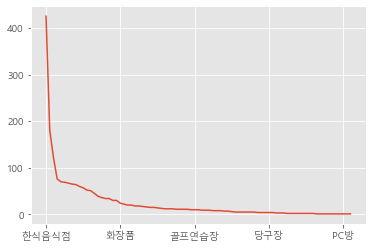

In [72]:
NAM_GOOD_DF["SVC_INDUTY_CD_NM_x"].value_counts().plot()
plt.show()

In [73]:
NAM_GOOD_DF["SVC_INDUTY_CD_NM_x"].value_counts().describe()

count     83.000000
mean      25.108434
std       53.063471
min        1.000000
25%        3.500000
50%       10.000000
75%       23.000000
max      425.000000
Name: SVC_INDUTY_CD_NM_x, dtype: float64

In [74]:
NAM_GOOD_DF = NAM_GOOD_DF.iloc[:,[0,1,8]]
NAM_GOOD_DF.columns = ["BLCK_CD","SVC_INDUTY_CD_NM","RATIO_SCORE"]

In [75]:
#전체 파워 업종 중 개수가 비교적 적은 파워 업종 제거
induty_list = NAM_GOOD_DF.groupby("SVC_INDUTY_CD_NM").count()["BLCK_CD"].add_suffix("").reset_index()
#NAM_GOOD_DF["SVC_INDUTY_CD_NM"].value_counts().describe()["50%"]
induty_list[induty_list["BLCK_CD"]>=NAM_GOOD_DF["SVC_INDUTY_CD_NM"].value_counts().describe()["50%"]]
NAM_GOOD_DF = pd.merge(NAM_GOOD_DF,induty_list[induty_list["BLCK_CD"]>=NAM_GOOD_DF["SVC_INDUTY_CD_NM"].value_counts().describe()["50%"]],on="SVC_INDUTY_CD_NM")


In [76]:
NAM_GOOD_DF.columns = ["BLCK_CD","SVC_INDUTY_CD_NM","RATIO_SCORE","count"]

In [87]:
NAM_GOOD_DF


,BLCK_CD,SVC_INDUTY_CD_NM,RATIO_SCORE,count
0,3578,편의점,2.120220,122
1,18080,편의점,0.946068,122
2,23054,편의점,2.011199,122
3,26949,편의점,3.160230,122
4,27271,편의점,3.019498,122
...,...,...,...,...
1923,279881,노래방,1.301353,13
1924,349747,노래방,1.236932,13
1925,353305,노래방,1.793231,13
1926,353368,노래방,1.509783,13


In [271]:
#강북구

In [79]:
BUK_GOOD_DF = pd.concat([BUK_GOOD_DF_1,BUK_GOOD_DF_2])

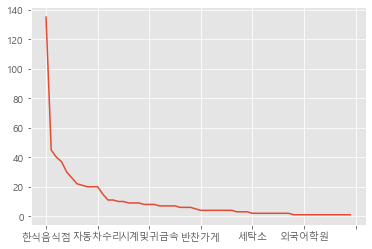

In [80]:
BUK_GOOD_DF["SVC_INDUTY_CD_NM_x"].value_counts().plot()
plt.show()

In [81]:
BUK_GOOD_DF["SVC_INDUTY_CD_NM_x"].value_counts().describe()

count     60.000000
mean      10.666667
std       19.181264
min        1.000000
25%        2.000000
50%        4.500000
75%       10.000000
max      135.000000
Name: SVC_INDUTY_CD_NM_x, dtype: float64

In [82]:
BUK_GOOD_DF = BUK_GOOD_DF.iloc[:,[0,1,8]]
BUK_GOOD_DF.columns = ["BLCK_CD","SVC_INDUTY_CD_NM","RATIO_SCORE"]
induty_list = BUK_GOOD_DF.groupby("SVC_INDUTY_CD_NM").count()["BLCK_CD"].add_suffix("").reset_index()
#BUK_GOOD_DF["SVC_INDUTY_CD_NM"].value_counts().describe()["50%"]
induty_list[induty_list["BLCK_CD"]>=BUK_GOOD_DF["SVC_INDUTY_CD_NM"].value_counts().describe()["75%"]]
BUK_GOOD_DF = pd.merge(BUK_GOOD_DF,induty_list[induty_list["BLCK_CD"]>=BUK_GOOD_DF["SVC_INDUTY_CD_NM"].value_counts().describe()["75%"]],on="SVC_INDUTY_CD_NM")


In [83]:
BUK_GOOD_DF

,BLCK_CD_x,SVC_INDUTY_CD_NM,RATIO_SCORE,BLCK_CD_y
0,169513,한식음식점,3.102969,135
1,213447,한식음식점,2.643528,135
2,213458,한식음식점,3.272755,135
3,213460,한식음식점,3.929401,135
4,213464,한식음식점,1.365214,135
...,...,...,...,...
468,220516,한의원,2.926953,10
469,220551,한의원,1.965905,10
470,220846,한의원,2.236375,10
471,221165,한의원,1.663684,10


In [84]:
BUK_GOOD_DF.columns = ["BLCK_CD","SVC_INDUTY_CD_NM","RATIO_SCORE","count"]

In [85]:
BUK_GOOD_DF

,BLCK_CD,SVC_INDUTY_CD_NM,RATIO_SCORE,count
0,169513,한식음식점,3.102969,135
1,213447,한식음식점,2.643528,135
2,213458,한식음식점,3.272755,135
3,213460,한식음식점,3.929401,135
4,213464,한식음식점,1.365214,135
...,...,...,...,...
468,220516,한의원,2.926953,10
469,220551,한의원,1.965905,10
470,220846,한의원,2.236375,10
471,221165,한의원,1.663684,10


In [396]:
BUK_GOOD_DF["SVC_INDUTY_CD_NM"].value_counts()

한식음식점      135
슈퍼마켓        45
편의점         40
일반의원        37
의약품         30
육류판매        26
치과의원        22
호프-간이주점     21
미용실         20
자동차수리       20
치킨전문점       20
일반의류        15
제과점         11
주유소         11
중식음식점       10
한의원         10
Name: SVC_INDUTY_CD_NM, dtype: int64

## 3.4.2 시각화(Sample)

In [55]:
sample =COLL_DF[COLL_DF["BLCK_CD"]==339723]
sample.sort_values(by="RATIO_SCORE",ascending=False)

,BLCK_CD,SVC_INDUTY_CD_NM,BIZ_MNTH,BLCK_BIZ_MNTH,AMT,BLCK_AMT,BIZ_MNTH_RATIO,AMT_RATIO,RATIO_SCORE
16517,339723,일반의원,173.666667,110.798246,87750850.0,1.264469e+07,1.320259,3.961127,5.281385
16520,339723,치과의원,113.428571,110.798246,59918800.0,1.264469e+07,0.213556,2.493254,2.706810
16529,339723,한식음식점,94.766667,110.798246,47380250.0,1.264469e+07,-0.129304,1.831966,1.702663
16511,339723,여행사,160.307692,110.798246,24141306.0,1.264469e+07,1.074826,0.606336,1.681161
16530,339723,한의원,197.000000,110.798246,7331000.0,1.264469e+07,1.748942,-0.280246,1.468696
16507,339723,서적,176.800000,110.798246,6193570.0,1.264469e+07,1.377825,-0.340235,1.037590
16510,339723,여관,183.666667,110.798246,2990000.0,1.264469e+07,1.503980,-0.509192,0.994788
16515,339723,의약품,133.333333,110.798246,18561191.0,1.264469e+07,0.579249,0.312038,0.891287
16504,339723,변리사사무소,147.391304,110.798246,13334710.0,1.264469e+07,0.837524,0.036392,0.873916
16522,339723,커피-음료,122.000000,110.798246,22054640.0,1.264469e+07,0.371031,0.496284,0.867315


In [398]:
x =sample["BLCK_BIZ_MNTH"].values[0]
y =sample["BLCK_AMT"].values[0]

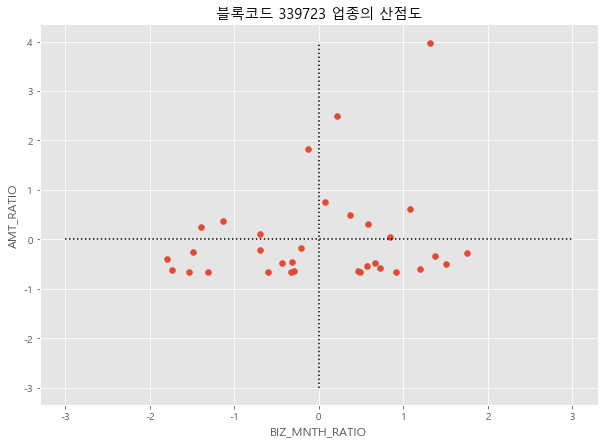

In [92]:
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize = (10,7))
plt.scatter(sample["BIZ_MNTH_RATIO"],sample["AMT_RATIO"])
plt.vlines([0],-3,4,linestyles=":")
plt.hlines([0],-3,3,linestyles=":")
plt.xlabel("BIZ_MNTH_RATIO")
plt.ylabel("AMT_RATIO")
plt.title("블록코드 339723 업종의 산점도")
plt.show()

In [401]:
NAM_GOOD_DF.to_csv("nam_good_df.csv",index=False)

In [402]:
BUK_GOOD_DF.to_csv("buk_good_df.csv",index = False)